In [ ]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn import metrics
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm


from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

# IMPORTING DATA

df = pd.read_csv('fraud (1).csv')


print(df.head(5))

   id  normalized_total_spent_last_24_hours  ...  Amount  Class
0   0                             -1.034134  ...  135.75      0
1   1                             -1.265760  ...    1.98      0
2   2                              2.240560  ...   24.00      0
3   3                            -22.322051  ...  212.00      0
4   4                             -0.522513  ...   19.99      0

[5 rows x 10 columns]


In [ ]:
# File analysis

# 1. Count & percentage

cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))


CASE COUNT
--------------------------------------------
Total number of cases are 10000
Number of Non-fraud cases are 9980
Number of fraud cases are 20
Percentage of fraud cases is 0.2
--------------------------------------------


In [ ]:
# 2. Description

nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))


CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    9980.000000
mean       85.248001
std       215.383867
min         0.000000
25%         5.900000
50%        22.805000
75%        77.102500
max      5356.420000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     20.000000
mean     116.392000
std      161.943599
min        0.830000
25%        1.497500
50%       48.795000
75%      109.067500
max      592.900000
Name: Amount, dtype: float64
--------------------------------------------


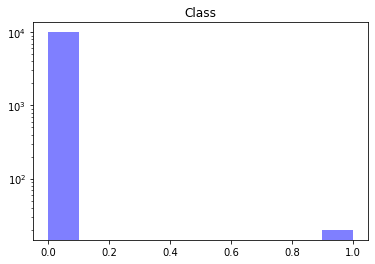

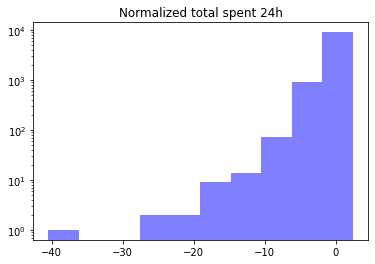

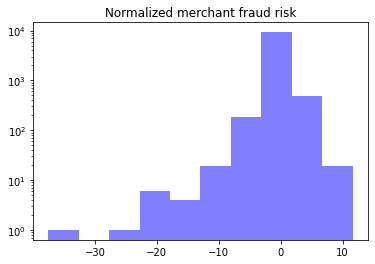

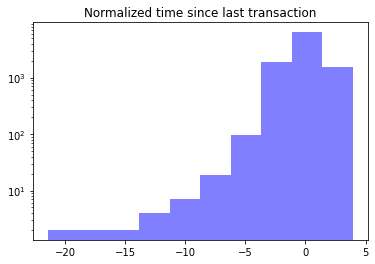

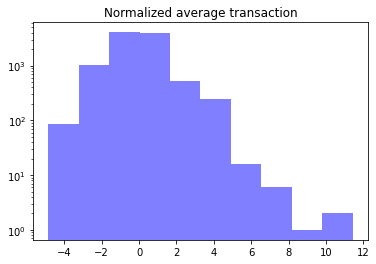

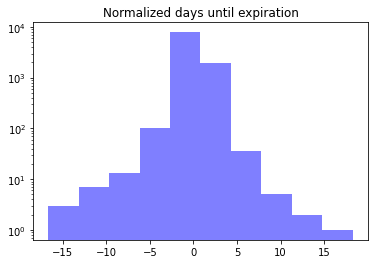

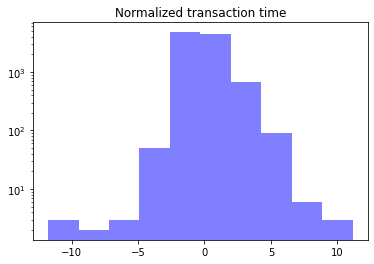

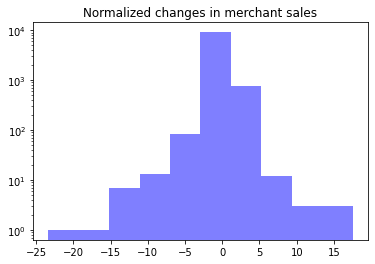

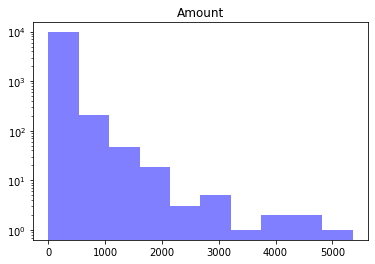

In [ ]:
#Plot the histograms of variables for potential use in a model

plt.hist(df['Class'], facecolor='blue', alpha=0.5,)
plt.title('Class')
plt.yscale("log")
plt.show()

plt.hist(df['normalized_total_spent_last_24_hours'], facecolor='blue', alpha=0.5)
plt.title('Normalized total spent 24h')
plt.yscale("log")
plt.show()

plt.hist(df['normalized_merchant_fraud_risk'], facecolor='blue', alpha=0.5)
plt.title('Normalized merchant fraud risk')
plt.yscale("log")
plt.show()

plt.hist(df['normalized_time_since_last_transaction'], facecolor='blue', alpha=0.5)
plt.title('Normalized time since last transaction')
plt.yscale("log")
plt.show()

plt.hist(df['normalized_average_transaction'], facecolor='blue', alpha=0.5)
plt.title('Normalized average transaction')
plt.yscale("log")
plt.show()

plt.hist(df['normalized_days_till_expiration'], facecolor='blue', alpha=0.5)
plt.title('Normalized days until expiration')
plt.yscale("log")
plt.show()

plt.hist(df['normalized_transaction_time'], facecolor='blue', alpha=0.5)
plt.title('Normalized transaction time')
plt.yscale("log")
plt.show()

plt.hist(df['normalized_change_in_merchant_sales'], facecolor='blue', alpha=0.5)
plt.title('Normalized changes in merchant sales')
plt.yscale("log")
plt.show()

plt.hist(df['Amount'], facecolor='blue', alpha=0.5)
plt.title('Amount')
plt.yscale("log")
plt.show()


# 'Class' is the target variable and all the others are preddictors variables. Here we plot the histograms of predictor variables and we can see that they are very concentrated which can result in a problem for the choice of variables for our supervised learning model.

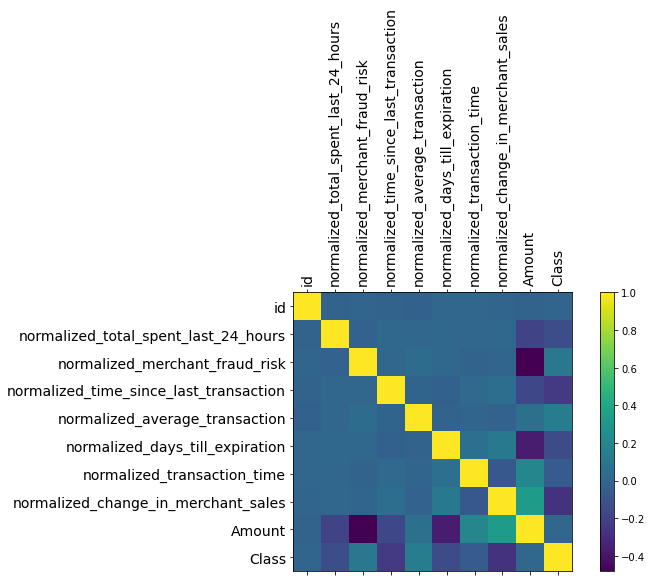

In [ ]:
#Correlation Matrix

corrMatrix = df.corr()
f = plt.figure(figsize=(10, 5))
plt.matshow(corrMatrix, fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

plt.show()

©©©#FINDINGS: some variables are more correlated (positively or negatively) to the "Class" variable and will be useful and used in our models for this characteristic.

In [ ]:
#Here we choose the predictor variables that we identified in the correlation matrix to be used in the models.

feature_cols = ['normalized_merchant_fraud_risk','normalized_time_since_last_transaction','normalized_change_in_merchant_sales','normalized_total_spent_last_24_hours']

# DATA SPLIT

X = df[feature_cols] # predictor
y = df['Class'] # response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:10])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:10])

X_train samples :       normalized_merchant_fraud_risk  ...  normalized_total_spent_last_24_hours
333                        0.199759  ...                             -0.386773

[1 rows x 4 columns]
X_test samples :        normalized_merchant_fraud_risk  ...  normalized_total_spent_last_24_hours
9394                        2.612182  ...                             -1.791312

[1 rows x 4 columns]
y_train samples :  333     0
6391    0
4786    0
357     0
9854    0
8305    0
6371    0
8189    0
6556    0
4006    0
Name: Class, dtype: int64
y_test samples :  9394    0
898     0
2398    0
5906    0
2343    0
8225    0
5506    0
6451    0
2670    0
3497    0
Name: Class, dtype: int64


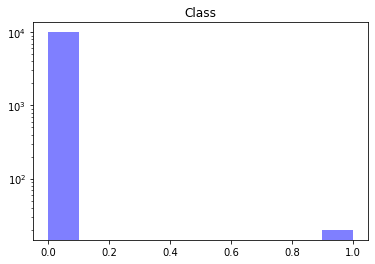

count    10000.000000
mean         0.002000
std          0.044679
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64


In [ ]:
#In the model variable class  will be used as dependent variable.
#Investigate statistically and visually this variable and suggest an appropriate method to deal with problem. Why we cannot use ordinary regression.
plt.hist(df['Class'], facecolor='blue', alpha=0.5,)
plt.title('Class')
plt.yscale("log")
plt.show()
print(df['Class'].describe())

#Linear regression is continuous while logistic regression is discrete. Here, as our dependant variable is discrete we can't use linear regrassion but we should use Logistic Regression.
#in orderto better predict faud, we will also use SVM and decision tree models to compare their respectives accuracy.


#	Which variables have influence to predict fraud? Explain the results as well as goodness of fit criteria.
#As mentioned before, variables that are the most correlated with the "Class" variables will be used 

In [ ]:
# 3. Confusion Matrix configuration
# Configuration  of the confusion matrix to be used for the models
# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




The next part is about testing the accuracy of the three models regarding different sizes of test samples.

We will then be able to compare the best test size that provide the best accuracy.

------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9505
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 1.0
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.05714285714285715
------------------------------------------------------------------------


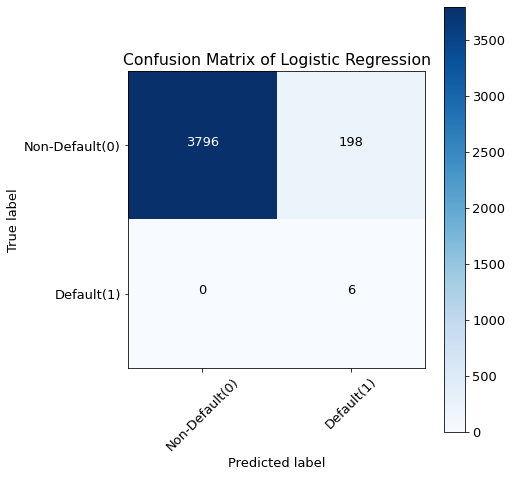

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3994
           1       0.03      1.00      0.06         6

    accuracy                           0.95      4000
   macro avg       0.51      0.98      0.52      4000
weighted avg       1.00      0.95      0.97      4000

ROC_AUC: 0.9752128192288433


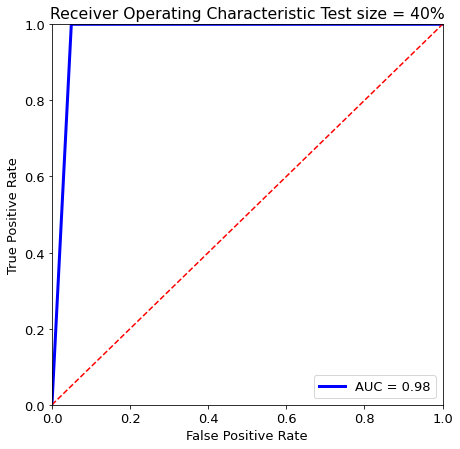

------------------------------------------------------------------------
Accuracy score of the SVM model is 0.97825
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 0.6666666666666666
------------------------------------------------------------------------
F1 score of the SVM model is 0.08421052631578947
------------------------------------------------------------------------


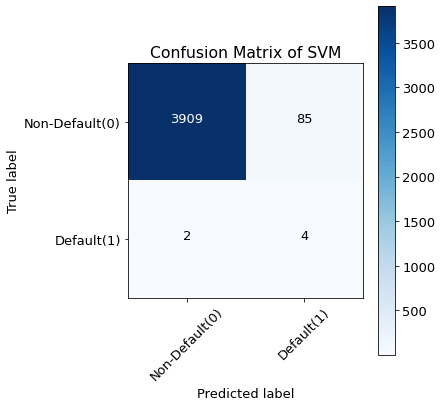

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3994
           1       0.04      0.67      0.08         6

    accuracy                           0.98      4000
   macro avg       0.52      0.82      0.54      4000
weighted avg       1.00      0.98      0.99      4000

ROC_AUC: 0.8226923718911701


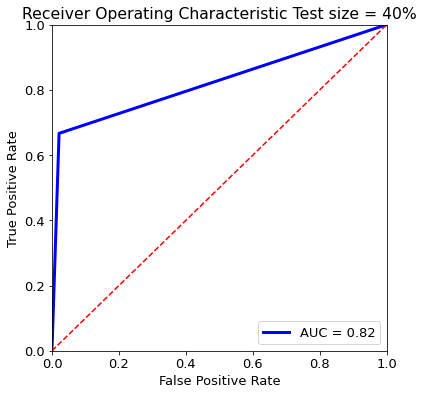

------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.97975
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 1.0
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.12903225806451613
------------------------------------------------------------------------


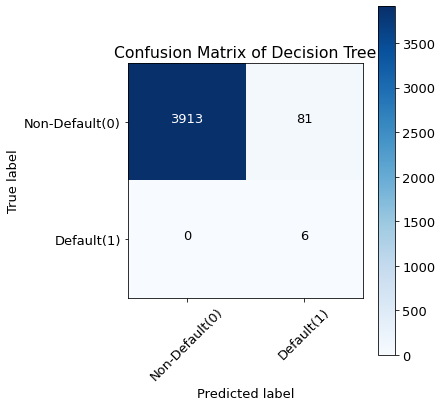

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3994
           1       0.07      1.00      0.13         6

    accuracy                           0.98      4000
   macro avg       0.53      0.99      0.56      4000
weighted avg       1.00      0.98      0.99      4000

ROC_AUC: 0.9898597896845268


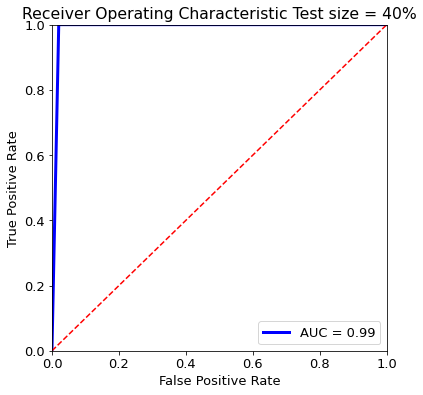

In [ ]:
#MODELLING: test_size = 40%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

# Logistic Regression Evaluation

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 1. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the model

lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams.update({'font.size': 13})

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()
print(classification_report(y_test, lr_yhat))

# 2. ROC curve

fpr, tpr, threshold = roc_curve(y_test, lr_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 40%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM Evaluation

svm = SVC(class_weight='balanced')
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machinession

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()
print(classification_report(y_test, svm_yhat))

# calculate roc curves
fpr, tpr, threshold = metrics.roc_curve(y_test, svm_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 40%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#  Decision Tree Evaluation

tree_model = DecisionTreeClassifier(max_depth = 4,class_weight='balanced', criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree

# Plot the confusion matrix

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()
print(classification_report(y_test, tree_yhat))

# calculate roc curves
fpr, tpr, threshold = metrics.roc_curve(y_test, tree_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 40%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


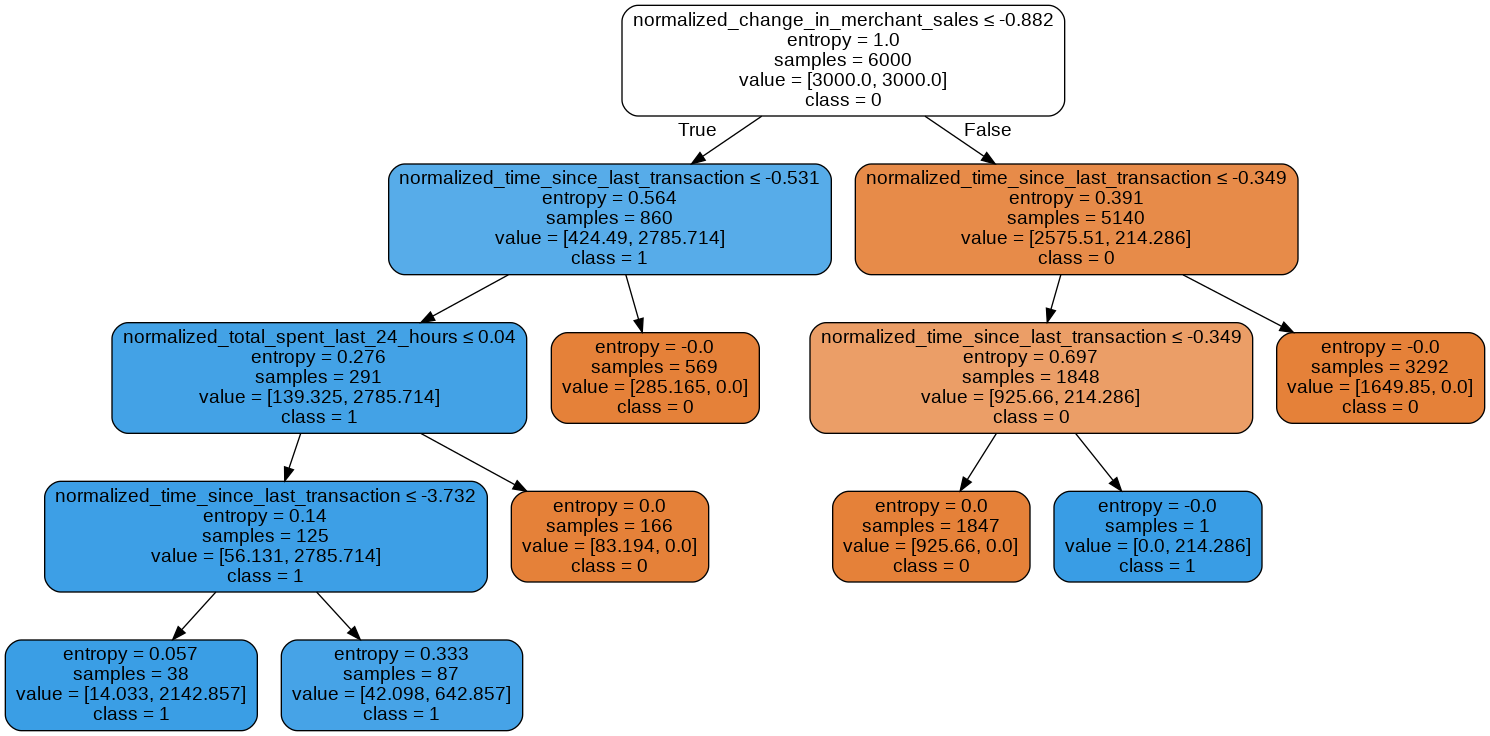

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('class.png')
Image(graph.create_png())

------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9493333333333334
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 1.0
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.0617283950617284
------------------------------------------------------------------------


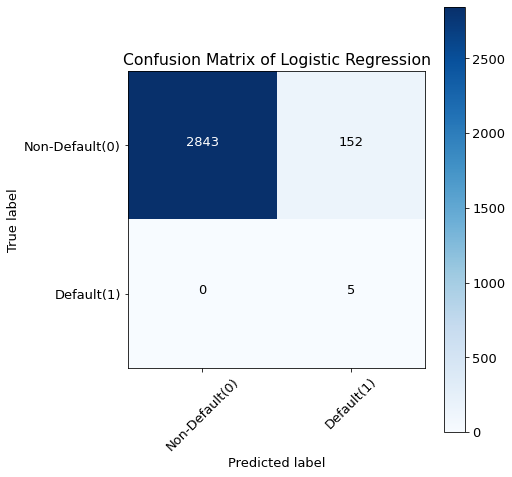

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2995
           1       0.03      1.00      0.06         5

    accuracy                           0.95      3000
   macro avg       0.52      0.97      0.52      3000
weighted avg       1.00      0.95      0.97      3000

ROC_AUC: 0.9746243739565944


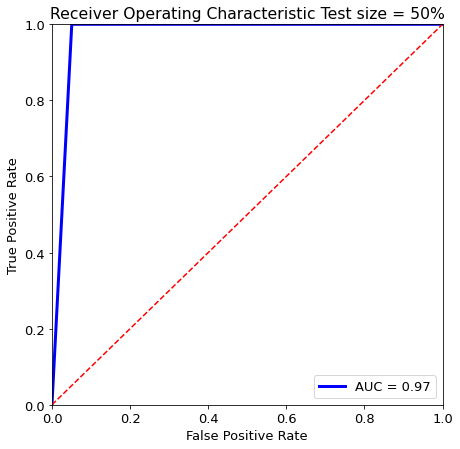

------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9786666666666667
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 0.6
------------------------------------------------------------------------
F1 score of the SVM model is 0.08571428571428573
------------------------------------------------------------------------


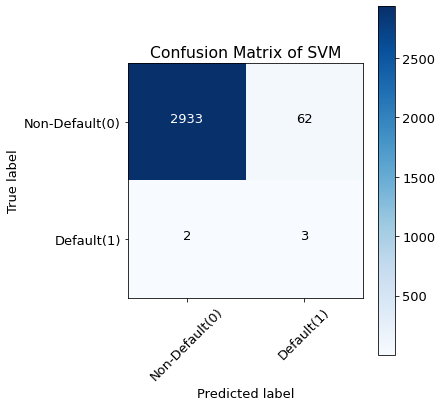

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2995
           1       0.05      0.60      0.09         5

    accuracy                           0.98      3000
   macro avg       0.52      0.79      0.54      3000
weighted avg       1.00      0.98      0.99      3000

ROC_AUC: 0.7896494156928214


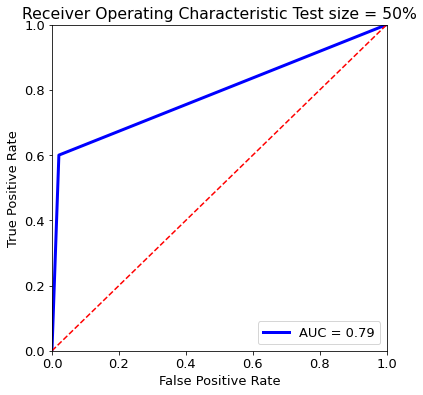

------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.978
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 1.0
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.13157894736842107
------------------------------------------------------------------------


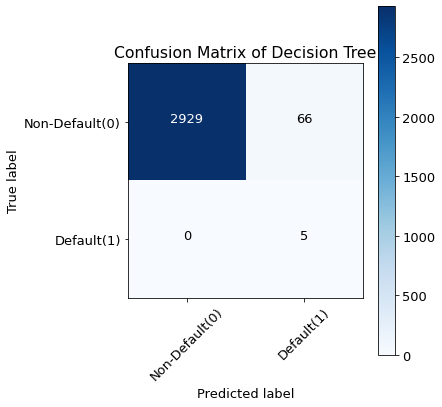

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2995
           1       0.07      1.00      0.13         5

    accuracy                           0.98      3000
   macro avg       0.54      0.99      0.56      3000
weighted avg       1.00      0.98      0.99      3000

ROC_AUC: 0.9889816360601001


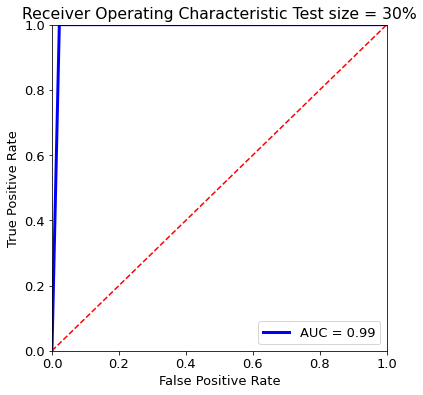

In [ ]:
#MODELLING: test_size = 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Logistic Regression Evaluation

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 1. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the model

lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams.update({'font.size': 13})
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()
print(classification_report(y_test, lr_yhat))

# 2. ROC curve

fpr, tpr, threshold = roc_curve(y_test, lr_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 50%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM Evaluation

svm = SVC(class_weight='balanced')
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machinession

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()
print(classification_report(y_test, svm_yhat))

# calculate roc curves
fpr, tpr, threshold = metrics.roc_curve(y_test, svm_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 50%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#  Decision Tree Evaluation

tree_model = DecisionTreeClassifier(max_depth = 4,class_weight='balanced', criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree

# Plot the confusion matrix

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()
print(classification_report(y_test, tree_yhat))

# calculate roc curves
fpr, tpr, threshold = metrics.roc_curve(y_test, tree_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 30%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

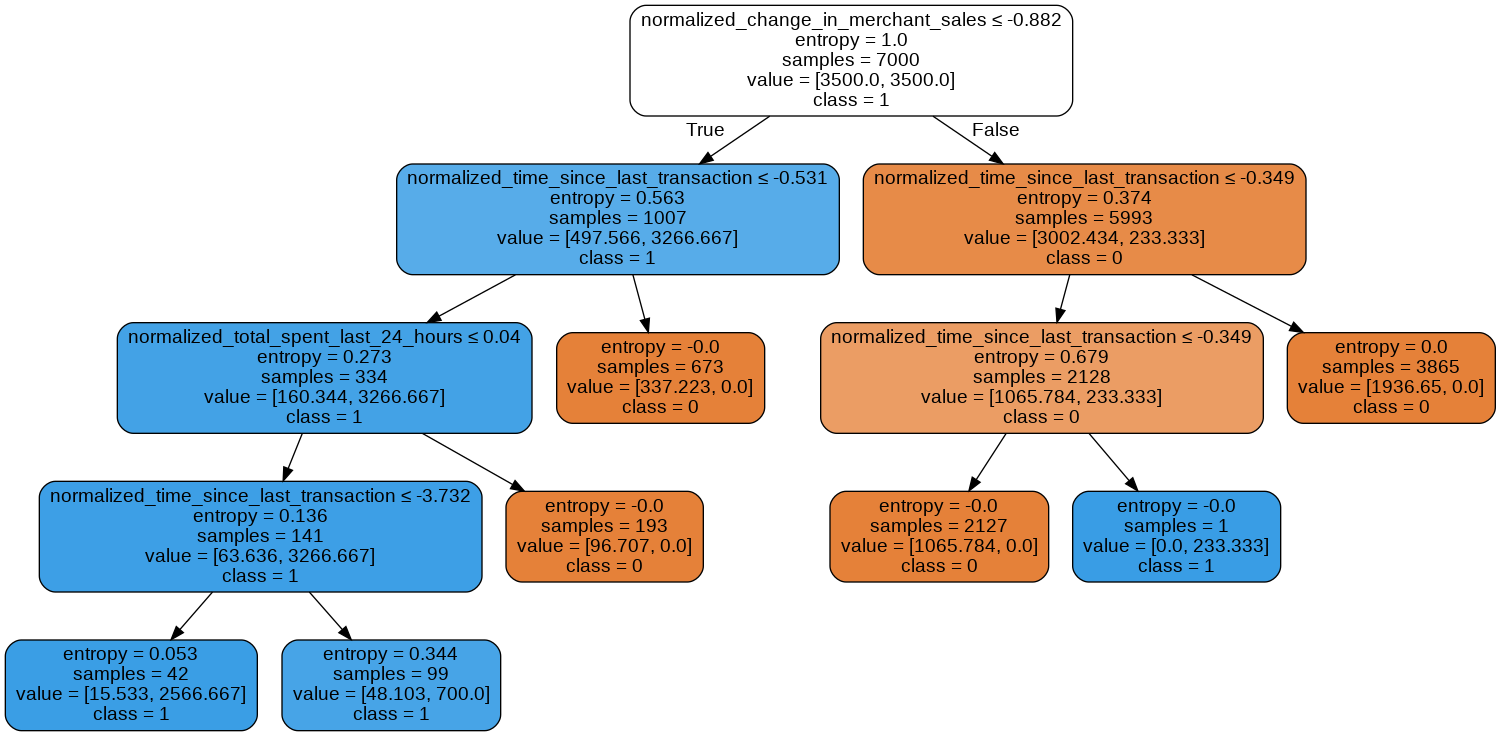

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('class.png')
Image(graph.create_png())

------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.999
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 1.0
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.6666666666666666
------------------------------------------------------------------------


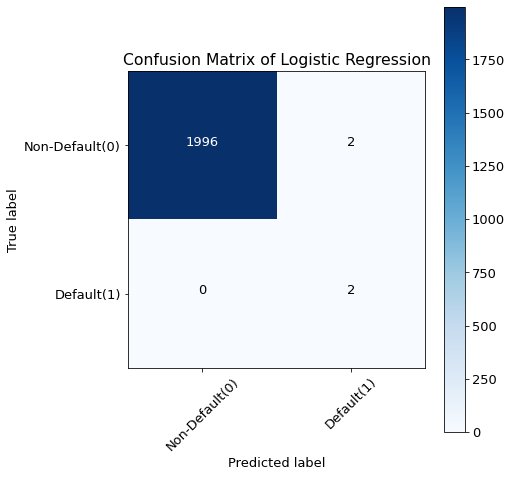

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       0.50      1.00      0.67         2

    accuracy                           1.00      2000
   macro avg       0.75      1.00      0.83      2000
weighted avg       1.00      1.00      1.00      2000

ROC_AUC: 0.9994994994994996


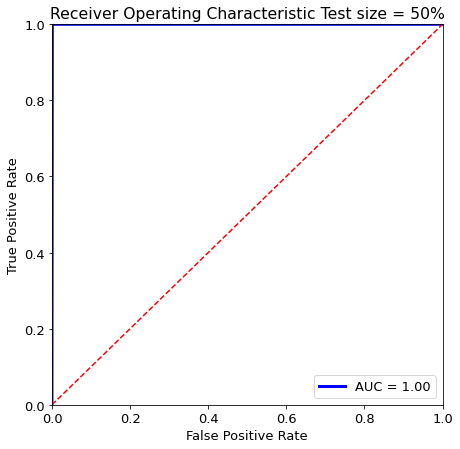

------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9995
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 0.5
------------------------------------------------------------------------
F1 score of the SVM model is 0.6666666666666666
------------------------------------------------------------------------


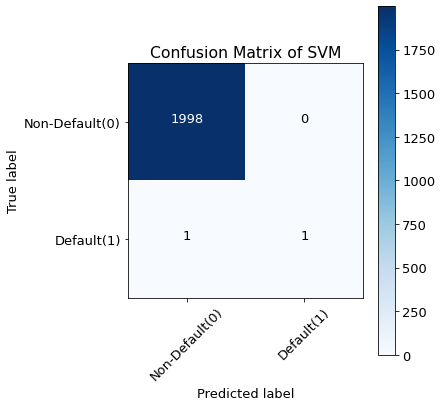

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       1.00      0.50      0.67         2

    accuracy                           1.00      2000
   macro avg       1.00      0.75      0.83      2000
weighted avg       1.00      1.00      1.00      2000

ROC_AUC: 0.75


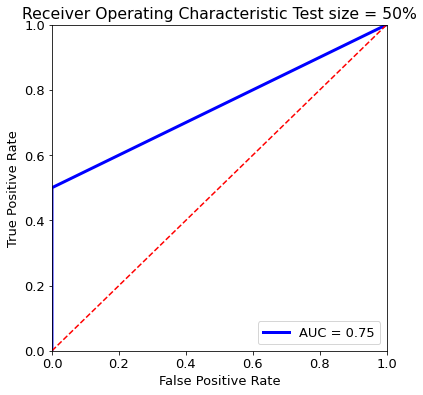

------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9995
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 1.0
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8
------------------------------------------------------------------------


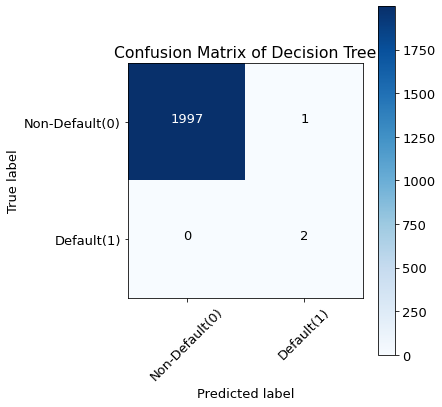

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       0.67      1.00      0.80         2

    accuracy                           1.00      2000
   macro avg       0.83      1.00      0.90      2000
weighted avg       1.00      1.00      1.00      2000

ROC_AUC: 0.9997497497497497


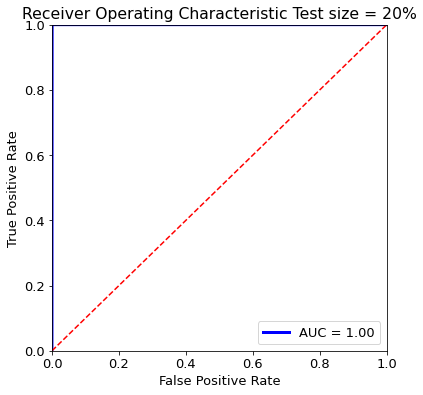

In [ ]:
#MODELLING: test_size = 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Logistic Regression Evaluation

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 1. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the model

lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams.update({'font.size': 13})

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()
print(classification_report(y_test, lr_yhat))

# 2. ROC curve

fpr, tpr, threshold = roc_curve(y_test, lr_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 50%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM Evaluation

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machinession

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()
print(classification_report(y_test, svm_yhat))

# calculate roc curves
fpr, tpr, threshold = metrics.roc_curve(y_test, svm_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 50%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#  Decision Tree Evaluation

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree

# Plot the confusion matrix

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()
print(classification_report(y_test, tree_yhat))

# calculate roc curves
fpr, tpr, threshold = metrics.roc_curve(y_test, tree_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 20%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Find the optimum size for traing and test datasets